# Log Transformation for skewed data


In [1]:
#importing necessary libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
#Creating a list of data 
data = [1,1,10,10,15,15,20,20,30,50,120,130,120,50,30,30,25,20,20,15,15,13,11,9,7,6,6,5,5,5,4,4,4,4,3,3,3,3,2,2,2,2,2,1]

In [3]:
#Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['Positively Skewed'])

In [4]:
#Print DataFrame 
df

,Positively Skewed
0,1
1,1
2,10
3,10
4,15
5,15
6,20
7,20
8,30
9,50


<AxesSubplot:>

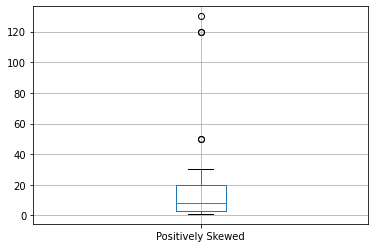

In [5]:
#Boxplot showing outliers
df.boxplot(column='Positively Skewed')

C:\Users\riyaj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

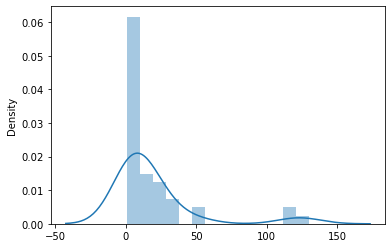

In [6]:
#Graph representing the dataframe
sns.distplot(df)

In [7]:
inp_data = df

In [8]:
#Applying log transformation on the data
out_data = np.log10(inp_data)
print(out_data)

    Positively Skewed
0            0.000000
1            0.000000
2            1.000000
3            1.000000
4            1.176091
5            1.176091
6            1.301030
7            1.301030
8            1.477121
9            1.698970
10           2.079181
11           2.113943
12           2.079181
13           1.698970
14           1.477121
15           1.477121
16           1.397940
17           1.301030
18           1.301030
19           1.176091
20           1.176091
21           1.113943
22           1.041393
23           0.954243
24           0.845098
25           0.778151
26           0.778151
27           0.698970
28           0.698970
29           0.698970
30           0.602060
31           0.602060
32           0.602060
33           0.602060
34           0.477121
35           0.477121
36           0.477121
37           0.477121
38           0.301030
39           0.301030
40           0.301030
41           0.301030
42           0.301030
43           0.000000


<AxesSubplot:>

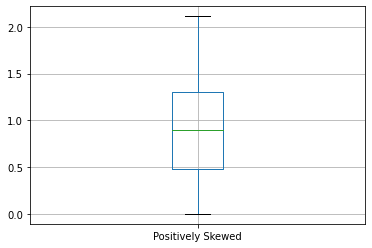

In [9]:
#Boxplot showing no outliers on the transformed data
out_data.boxplot(column='Positively Skewed')

C:\Users\riyaj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

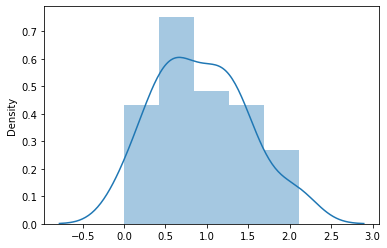

In [10]:
#Graph representing transformed data
sns.distplot(out_data)

# House Price Prediction (Linear Regression Model)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
#Loading Dataset
dataset = pd.read_csv('House.csv')

In [13]:
#Summarizing Data
print(dataset.shape)
print(dataset.head(5))

(1460, 2)
    area   price
0   8450  208500
1   9600  181500
2  11250  223500
3   9550  140000
4  14260  250000


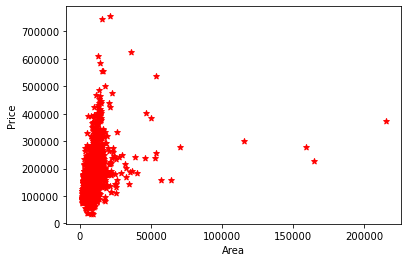

In [14]:
#Visualizing Dataset
plt.xlabel('Area')
plt.ylabel('Price')
plt.scatter(dataset.area,dataset.price,color='red',marker='*')

In [15]:
#Segregating dataset into input X and output Y
X=dataset.drop('price',axis='columns')
X

,area
0,8450
1,9600
2,11250
3,9550
4,14260
...,...
1455,7917
1456,13175
1457,9042
1458,9717


In [16]:
Y=dataset.price
Y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: price, Length: 1460, dtype: int64

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [19]:
#Plain data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred=model.predict(X_test)

In [21]:
# Log transformation of the features
X_train_log = np.log(X_train)
X_test_log = np.log(X_test)

In [22]:
# Square root transformation of the features
X_train_sqrt = np.sqrt(X_train)
X_test_sqrt = np.sqrt(X_test)


In [23]:
# Box-Cox transformation of the features
pt = PowerTransformer(method='box-cox')
X_train_boxcox = pt.fit_transform(X_train)
X_test_boxcox = pt.transform(X_test)

In [24]:
# Z-score normalization of the features
scaler = StandardScaler()
X_train_zscore = scaler.fit_transform(X_train)
X_test_zscore = scaler.transform(X_test)


In [25]:
# Fit a linear regression model to the training data using log transformation
reg_log = LinearRegression()
reg_log.fit(X_train_log, y_train)


LinearRegression()

In [26]:
# Make predictions on the test data using log transformation
y_pred_log = reg_log.predict(X_test_log)

In [27]:
# Fit a linear regression model to the training data using square root transformation
reg_sqrt = LinearRegression()
reg_sqrt.fit(X_train_sqrt, y_train)

LinearRegression()

In [28]:
# Make predictions on the test data using square root transformation
y_pred_sqrt = reg_sqrt.predict(X_test_sqrt)


In [29]:
# Fit a linear regression model to the training data using Box-Cox transformation
reg_boxcox = LinearRegression()
reg_boxcox.fit(X_train_boxcox, y_train)

LinearRegression()

In [30]:
# Make predictions on the test data using Box-Cox transformation
y_pred_boxcox = reg_boxcox.predict(X_test_boxcox)

In [31]:
# Fit a linear regression model to the training data using Z-score normalization
reg_zscore = LinearRegression()
reg_zscore.fit(X_train_zscore, y_train)


LinearRegression()

In [32]:
# Make predictions on the test data using Z-score normalization
y_pred_zscore = reg_zscore.predict(X_test_zscore)

In [33]:
# Evaluate the performance of the models
mse_plain = mean_squared_error(y_test, y_pred)
mse_log = mean_squared_error(y_test, y_pred_log)
mse_sqrt = mean_squared_error(y_test, y_pred_sqrt)
mse_boxcox = mean_squared_error(y_test, y_pred_boxcox)
mse_zscore = mean_squared_error(y_test, y_pred_zscore)


In [34]:
r2_plain = r2_score(y_test, y_pred)
r2_log = r2_score(y_test, y_pred_log)
r2_sqrt = r2_score(y_test, y_pred_sqrt)
r2_boxcox = r2_score(y_test, y_pred_boxcox)
r2_zscore = r2_score(y_test, y_pred_zscore)

In [38]:
print("Results using Plain data:")
print("Mean squared error: %f" % mse_plain)
print("R2 score: %f" % r2_plain)
print()

Results using Plain data:
Mean squared error: 6516085517.159481
R2 score: 0.066208



In [39]:
print("Results using Log transformation:")
print("Mean squared error: %f" % mse_log)
print("R2 score: %f" % r2_log)
print()

Results using Log transformation:
Mean squared error: 6059403305.548991
R2 score: 0.131653



In [40]:
print("Results using Square root transformation:")
print("Mean squared error: %f" % mse_sqrt)
print("R2 score: %f" % r2_sqrt)
print()


Results using Square root transformation:
Mean squared error: 6101310793.110592
R2 score: 0.125648



In [41]:
print("Results using Box-Cox transformation:")
print("Mean squared error: %f" % mse_boxcox)
print("R2 score: %f" %r2_boxcox)

Results using Box-Cox transformation:
Mean squared error: 6059619570.720587
R2 score: 0.131623
